In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("cleaned_data.csv") #read dataset
df.head()#shows first few values
df.drop("Grade", axis=1, inplace=True)

In [4]:
df.dtypes
categorical_features = df.select_dtypes(include = "object").columns
numerical_features = df.select_dtypes(include = "int64").columns

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform) # Encoding all categorical features

In [6]:
from sklearn.preprocessing import RobustScaler

# Apllying RobustScaler to scale orginal numerical features
df[numerical_features] = RobustScaler().fit_transform(df[numerical_features])
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,1.000000,2,1,0,0,0,1,1,-1.000000,1,1,1.222222,-0.333333,-0.382353
1,-0.285714,2,1,1,1,2,0,1,0.476190,1,1,0.111111,1.000000,-0.323529
2,0.285714,2,0,2,2,4,0,1,1.809524,1,1,0.111111,1.666667,0.058824
3,0.285714,2,1,0,0,0,1,1,-0.333333,1,1,-1.222222,-0.333333,0.323529
4,-0.500000,2,1,1,0,1,1,1,0.761905,1,1,-1.111111,-0.333333,-0.676471


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df.drop(["Tumor Size (mm)", "T Stage", "6th Stage"], axis=1)
y = df["Tumor Size (mm)"]
X

,Age,Race,Marital Status,N Stage,Differentiate,A Stage,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,1.000000,2,1,0,1,1,1,1,1.222222,-0.333333,-0.382353
1,-0.285714,2,1,1,0,1,1,1,0.111111,1.000000,-0.323529
2,0.285714,2,0,2,0,1,1,1,0.111111,1.666667,0.058824
3,0.285714,2,1,0,1,1,1,1,-1.222222,-0.333333,0.323529
4,-0.500000,2,1,0,1,1,1,1,-1.111111,-0.333333,-0.676471
...,...,...,...,...,...,...,...,...,...,...,...
3886,0.571429,1,1,0,0,1,1,1,-1.333333,-0.333333,-0.705882
3887,0.142857,2,0,1,0,1,1,1,0.111111,2.000000,-0.117647
3888,1.000000,2,1,0,0,1,1,0,-0.222222,0.333333,-0.117647
3889,0.285714,0,0,0,0,1,1,1,-0.222222,-0.333333,-0.029412


In [8]:
from sklearn.model_selection import train_test_split #splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
np.random.seed(42)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [10]:
mae

0.6964711639903586

In [11]:
mse

0.9693132047015509

In [12]:
r2

0.07729515577781088

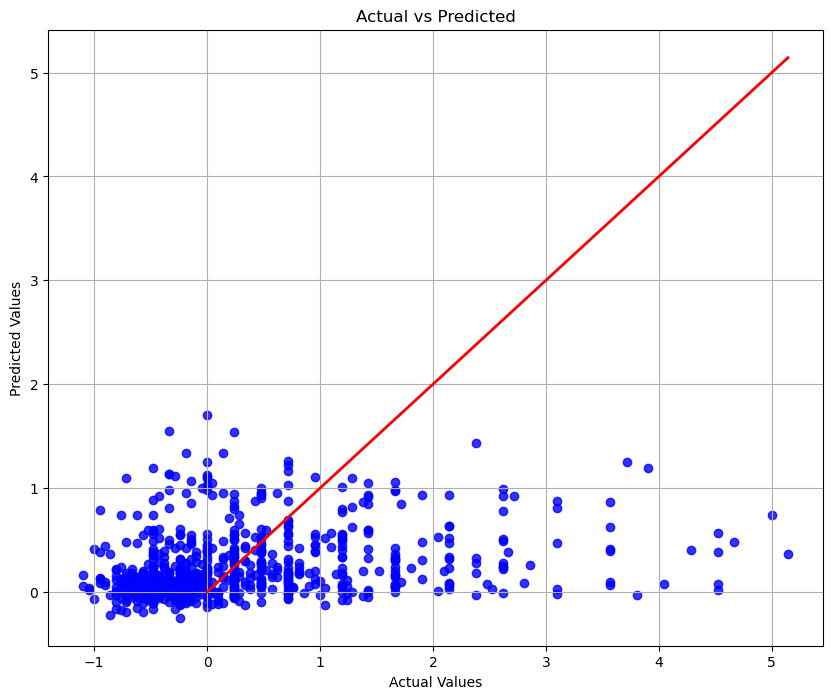

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [14]:
coefficients = model.coef_

# Print coefficients along with corresponding feature names
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

Age: -0.11417200296690194
Race: 0.043371628356563614
Marital Status: -0.012993126829448792
N Stage: 0.17922319364035624
Differentiate: -0.025985127005115027
A Stage: -0.40736166865413553
Estrogen Status: -0.015437832365269756
Progesterone Status: -0.12510928914690425
Regional Node Examined: -0.0023133591051104916
Regional Node Positive: 0.12845492879948506
Survival Months: -0.039741506083030016


In [15]:
X = df[["Age", "N Stage", "A Stage", "Progesterone Status", "Regional Node Positive"]]
y  = df["Tumor Size (mm)"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [17]:
mae

0.6970252946063945

In [18]:
mse

0.9665449812936888

In [19]:
r2

0.0799302722045081

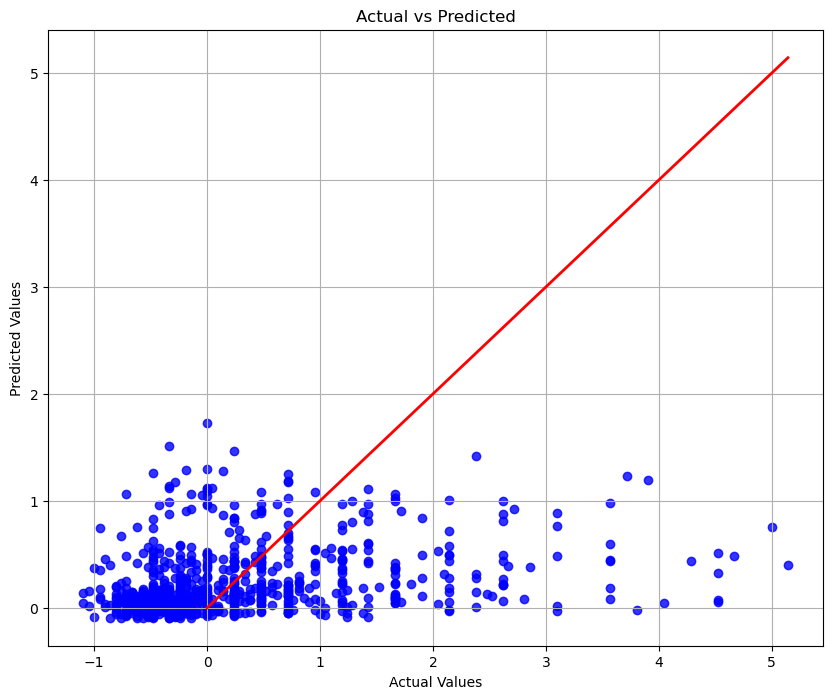

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [21]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [22]:
model = LinearRegressionGD(learning_rate=0.001, n_iterations=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

In [23]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [24]:
mae

0.7020390681068318

In [25]:
mse

0.9658937735477802

In [26]:
r2

0.08055016734142617

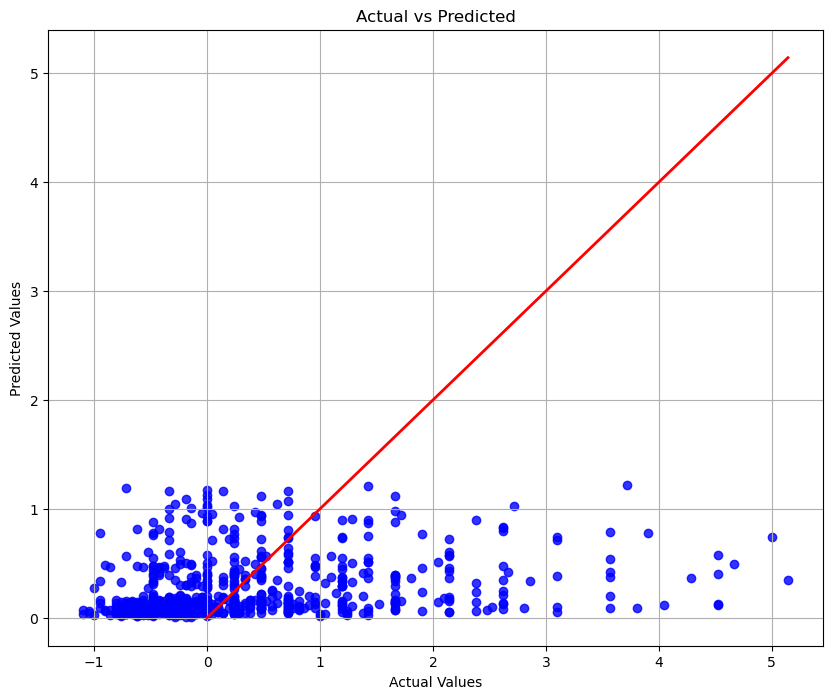

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer

In [29]:
lasso = Lasso()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10.0]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring = scorer, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_lasso = Lasso(alpha=best_alpha)

best_lasso.fit(X_train, y_train)

predictions = best_lasso.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [30]:
mae

0.6971152638284459

In [31]:
mse

0.9657644335903931

In [32]:
r2

0.08067328812906593

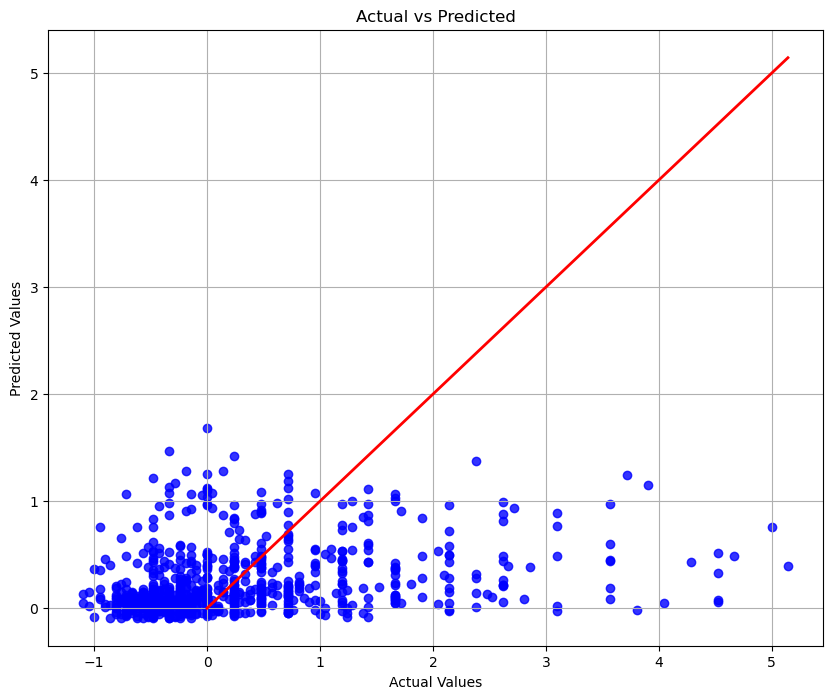

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color='blue', alpha=0.8)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='-', linewidth=2)
plt.show()